<a href="https://colab.research.google.com/github/Patriciangugi/dsc-effect-sizes-pvalues-and-power-lab/blob/master/Effect_Size%2C_P_Values_and_Power_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats

In [2]:
def generate_samples(m1, s1, n1, m2, s2, n2):
    """
    Generate two random samples from two normal distributions.

    Parameters:
    m1 (float): Mean of the first distribution
    s1 (float): Standard deviation of the first distribution
    n1 (int): Sample size of the first distribution
    m2 (float): Mean of the second distribution
    s2 (float): Standard deviation of the second distribution
    n2 (int): Sample size of the second distribution

    Returns:
    sample1 (np.ndarray): Random sample from the first distribution
    sample2 (np.ndarray): Random sample from the second distribution
    """
    sample1 = np.random.normal(m1, s1, n1)
    sample2 = np.random.normal(m2, s2, n2)
    return sample1, sample2

# Example usage
m1, s1, n1 = 20, 5, 30
m2, s2, n2 = 22, 5, 30

sample1, sample2 = generate_samples(m1, s1, n1, m2, s2, n2)
print("Sample 1:", sample1)
print("Sample 2:", sample2)


Sample 1: [22.26135979 19.10073141 18.81651981 16.56595738 26.95651458 25.97526545
 20.58074839 17.55300929 15.65150465 21.83743519 21.68126489 20.07232672
 12.46299298 24.79768219 14.0547561  14.62327245 21.60533961 18.6359276
 22.70624555  9.5382122  23.10636591 23.35658102 23.69800098 15.98120796
 15.60894637 11.46352513 24.28544331 12.25651026 16.92450075 27.25605474]
Sample 2: [17.44052877 22.74694407 26.00441343  6.25080994 32.47671628 15.71466794
 24.4531316  20.70010642 28.42796198 22.06924677 19.67821156 31.27330903
 25.29456854 18.50874375 12.63498211 25.62975719 24.44733478 17.26948733
 25.06797543 30.93814272 24.06279281 26.89665849 29.12195769 26.58702238
 20.58171104 14.23767476  8.31981048 29.36807691 16.51165019 18.83907655]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from scipy.stats import ttest_ind

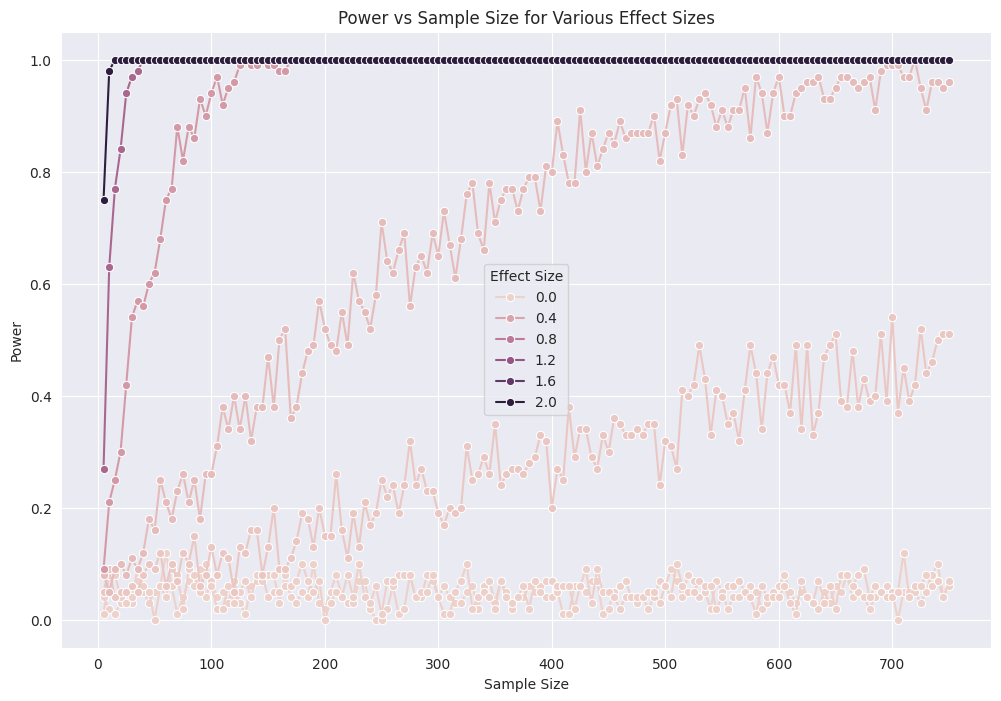

In [6]:
# Set the seed for reproducibility
np.random.seed(42)

# Function to generate samples
def generate_samples(sample_size, mean1, mean2, std_dev):
    sample1 = np.random.normal(loc=mean1, scale=std_dev, size=sample_size)
    sample2 = np.random.normal(loc=mean2, scale=std_dev, size=sample_size)
    return sample1, sample2

# Function to calculate p-value for Welch's t-test
def p_value_welch_ttest(sample1, sample2):
    t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False)
    return p_value

# Function to calculate power
def calculate_power(p_values, alpha=0.05):
    return np.mean(np.array(p_values) < alpha) # Convert p_values to a NumPy array

# Main function to run simulations and plot results
def run_simulations(effect_sizes, sample_sizes, num_simulations=100, alpha=0.05):
    results = []

    for effect_size in effect_sizes:
        for sample_size in sample_sizes:
            p_values = []
            for _ in range(num_simulations):
                sample1, sample2 = generate_samples(sample_size, mean1=5, mean2=5 + effect_size, std_dev=1)
                p_value = p_value_welch_ttest(sample1, sample2)
                p_values.append(p_value)

            power = calculate_power(p_values, alpha)
            results.append({'Effect Size': effect_size, 'Sample Size': sample_size, 'Power': power})

    return pd.DataFrame(results)

# Define parameters
effect_sizes = [0, 0.01, 0.1, 0.2, 0.5, 1, 2]
sample_sizes = list(range(5, 751, 5))  # Sample sizes from 5 to 750

# Run simulations
df_results = run_simulations(effect_sizes, sample_sizes)

# Plot results
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_results, x='Sample Size', y='Power', hue='Effect Size', marker='o')
plt.title('Power vs Sample Size for Various Effect Sizes')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.legend(title='Effect Size')
plt.grid(True)
plt.show()